# Cristian Valeria

### Tech_challenge_DA_2023

The Problem

- Company: Cabify
- find the best combustible?
- what is the best? the less expensive or the mosto green one or a balance. 

Other usefull information: 

- SP98 (sold as "Super plus" sometimes) and SP95 E10 (This is, "super" gas with 10% Alcohol).
- E10 is sold for 1,38€; SP98 is sold for 1,46€; per liter.

#### DataContent

Since a few months, i write down the data of my car's display after each ride; while regularly changing the gas type.

In the file, you will find the displayed distance (km); the consume (L/100km); the average speed (km/h), the temperature i had inside (°C), the temperature outside (°C), anything special that happened, if it was raining, if the air condition was on, if it was sunny enough that the car felt warm when i started it… and yes - the gas type i was using. I have also two columns saying how much and which gas type I was buying. Careful with those. The numbers don't add exactly up, because I note only the rides that occur under certain conditions: If the car was not cooling down enough to have another independent measure from the one before, i don't note it.

I started writing down the data in November, changed to SP98 in winter, and back to E10 in spring. Apart from that, the data is rather clean as i was doing my own project on it already.

### 1. Exploratory data analysis

In [196]:
import pandas as pd

In [197]:
! ls data

measurements.csv   measurements2.xlsx


1.1. Reding the Data 1

In [198]:
data = pd.read_csv('data/measurements.csv')

1.2. Exploring Data

In [199]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [201]:
data.describe()

,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


In [202]:
data2 = pd.read_excel('data/measurements2.xlsx')
data2.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [203]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [204]:
# data 2 is the same that Data

1.2. dealing with NaN

In [205]:
data.isnull().sum()/len(data)

distance         0.000000
consume          0.000000
speed            0.000000
temp_inside      0.030928
temp_outside     0.000000
specials         0.760309
gas_type         0.000000
AC               0.000000
rain             0.000000
sun              0.000000
refill liters    0.966495
refill gas       0.966495
dtype: float64

In [206]:
# will drop columsn that have more than 50% of missing values and erase missing values if they are less than 5%

In [207]:
data = data.drop(columns=['refill liters','refill gas','specials'])

In [208]:
data.isnull().sum()/len(data)

distance        0.000000
consume         0.000000
speed           0.000000
temp_inside     0.030928
temp_outside    0.000000
gas_type        0.000000
AC              0.000000
rain            0.000000
sun             0.000000
dtype: float64

In [209]:
data = data.dropna()

In [210]:
# transform into integer or float 

In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   distance      376 non-null    object
 1   consume       376 non-null    object
 2   speed         376 non-null    int64 
 3   temp_inside   376 non-null    object
 4   temp_outside  376 non-null    int64 
 5   gas_type      376 non-null    object
 6   AC            376 non-null    int64 
 7   rain          376 non-null    int64 
 8   sun           376 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 29.4+ KB


In [212]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,"21,5",12,E10,0,0,0
1,12,"4,2",30,"21,5",13,E10,0,0,0
2,"11,2","5,5",38,"21,5",15,E10,0,0,0
3,"12,9","3,9",36,"21,5",14,E10,0,0,0
4,"18,5","4,5",46,"21,5",15,E10,0,0,0


1.3. Data to numerical

In [214]:
data['distance'] = data['distance'].str.replace(',', '.')
data['consume'] = data['consume'].str.replace(',', '.')
data['temp_inside'] = data['temp_inside'].str.replace(',', '.')

In [215]:
data['distance'] = pd.to_numeric(data.distance,errors='coerce').astype(float)
data['consume'] = pd.to_numeric(data.consume,errors='coerce').astype(float)
data['temp_inside'] = pd.to_numeric(data.temp_inside,errors='coerce').astype(float)

In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      376 non-null    float64
 1   consume       376 non-null    float64
 2   speed         376 non-null    int64  
 3   temp_inside   376 non-null    float64
 4   temp_outside  376 non-null    int64  
 5   gas_type      376 non-null    object 
 6   AC            376 non-null    int64  
 7   rain          376 non-null    int64  
 8   sun           376 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 29.4+ KB


In [217]:
data.gas_type.value_counts()

SP98    219
E10     157
Name: gas_type, dtype: int64

1.4. Adding usefull columns

In [218]:
data = data[['gas_type', 'distance', 'consume', 'speed', 'temp_inside', 'temp_outside','AC', 'rain', 'sun']]

#### a) Unitary price

In [219]:
data['unitary_price'] = data['gas_type'].map({'E10': 1.38, 'SP98': 1.46})
data.head()

,gas_type,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,unitary_price
0,E10,28.0,5.0,26,21.5,12,0,0,0,1.38
1,E10,12.0,4.2,30,21.5,13,0,0,0,1.38
2,E10,11.2,5.5,38,21.5,15,0,0,0,1.38
3,E10,12.9,3.9,36,21.5,14,0,0,0,1.38
4,E10,18.5,4.5,46,21.5,15,0,0,0,1.38


#### b) Total price ($L/100km)

In [220]:
data['total_price'] = data['consume']*data['unitary_price']
data.head()

,gas_type,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,unitary_price,total_price
0,E10,28.0,5.0,26,21.5,12,0,0,0,1.38,6.900
1,E10,12.0,4.2,30,21.5,13,0,0,0,1.38,5.796
2,E10,11.2,5.5,38,21.5,15,0,0,0,1.38,7.590
3,E10,12.9,3.9,36,21.5,14,0,0,0,1.38,5.382
4,E10,18.5,4.5,46,21.5,15,0,0,0,1.38,6.210


In [221]:
data['total_price'] = data['total_price'].round(2)

In [222]:
data.head()

,gas_type,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,unitary_price,total_price
0,E10,28.0,5.0,26,21.5,12,0,0,0,1.38,6.90
1,E10,12.0,4.2,30,21.5,13,0,0,0,1.38,5.80
2,E10,11.2,5.5,38,21.5,15,0,0,0,1.38,7.59
3,E10,12.9,3.9,36,21.5,14,0,0,0,1.38,5.38
4,E10,18.5,4.5,46,21.5,15,0,0,0,1.38,6.21


### 2. Visualization

2.1. group by important data

In [223]:
data.groupby("gas_type")["consume"].agg([np.mean,np.median,np.min,np.max])

,mean,median,amin,amax
gas_type,,,,
E10,4.950955,4.8,3.7,10.8
SP98,4.906849,4.7,3.3,12.2


In [224]:
data.groupby("gas_type")["total_price"].agg([np.mean,np.median,np.min,np.max])

,mean,median,amin,amax
gas_type,,,,
E10,6.832229,6.62,5.11,14.90
SP98,7.164155,6.86,4.82,17.81


2.2. Data Visualization

In [225]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

a) different between consume on Gas_Types:

<AxesSubplot:xlabel='gas_type', ylabel='consume'>

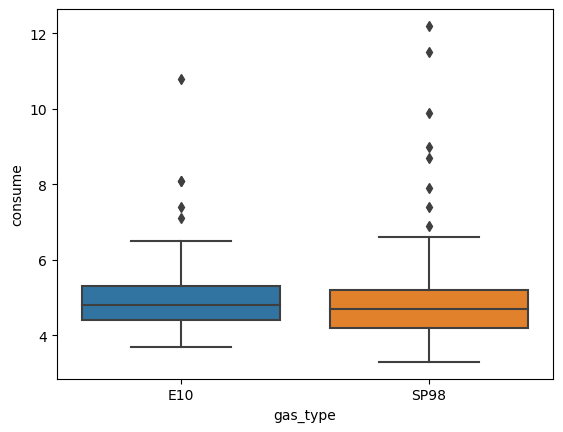

In [226]:
sns.boxplot(x=data.gas_type,y=data.consume)

b) Price_per_km on Gas_Types:

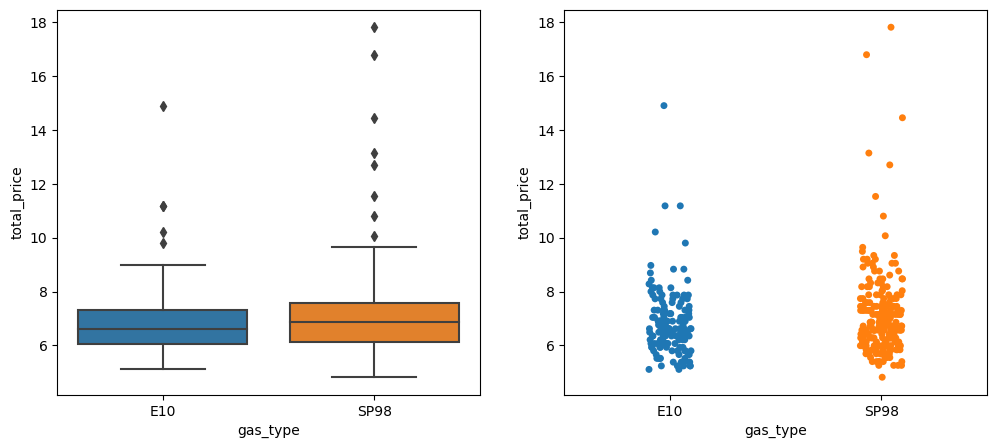

In [227]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.boxplot(x=data.gas_type, y=data.total_price, ax=ax[0])

sns.stripplot(x=data.gas_type, y=data.total_price, ax=ax[1])

plt.show()

In [228]:
# you can see that prices per km in SP98 are higher and with more extreme values

c) correlations

[Text(0.5, 1.0, 'SP98')]

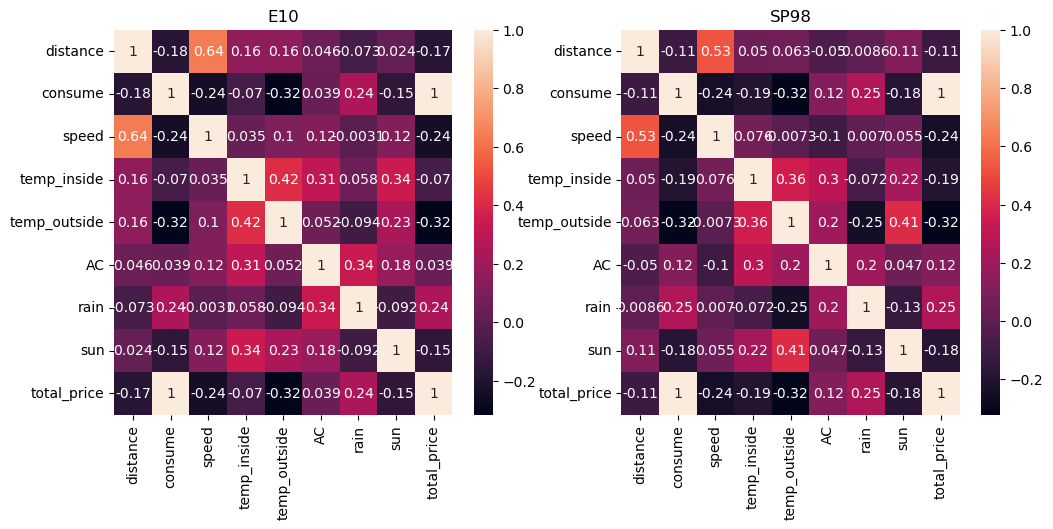

In [229]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(data[data['gas_type']=='E10'].drop(columns=['unitary_price']).corr(), annot=True, ax=ax[0]).set(title='E10')

sns.heatmap(data[data['gas_type']!='E10'].drop(columns=['unitary_price']).corr(), annot=True, ax=ax[1]).set(title='SP98')

Not big correlations between variables. Special focus to the price. It shows that is not higly afected by rain or sun for example. 

If you compare both you can see the correlation of price on E10 is smoller than on the other type. It means that it works better in different conditins, like temperature, rain or sun. Anyway difference are small, almost irrelevant. 

d) other plots

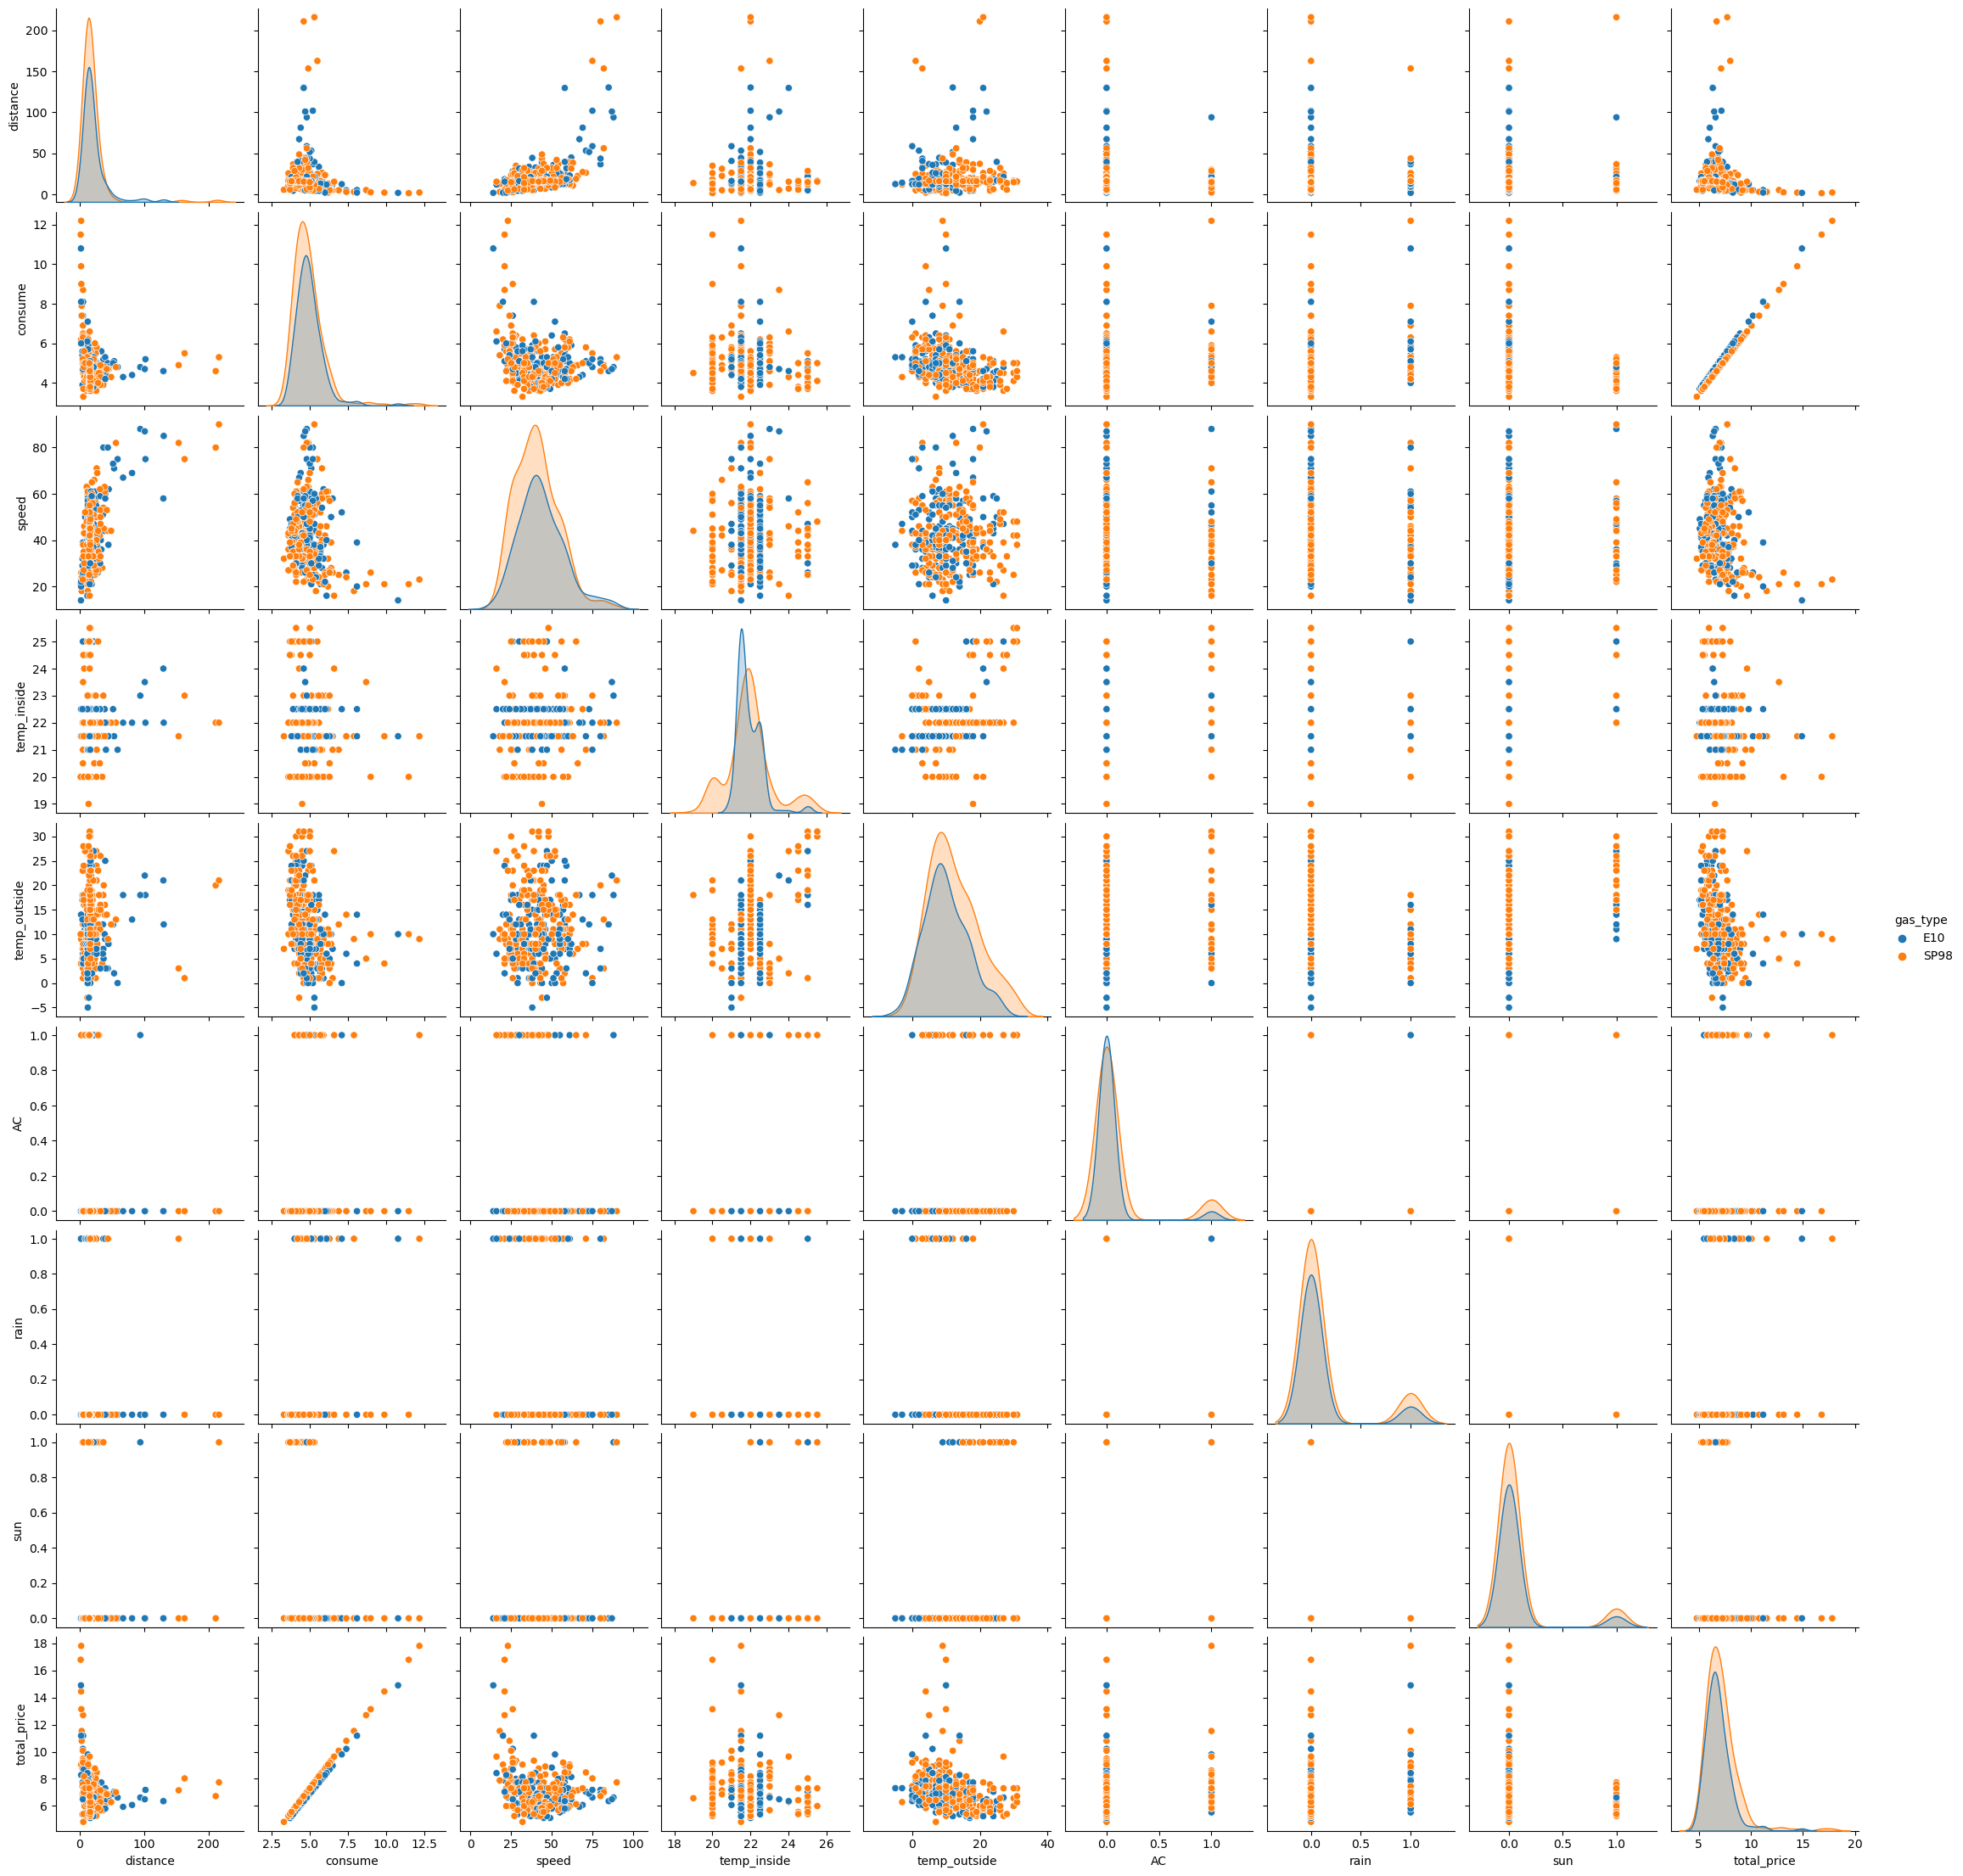

In [230]:
sns.pairplot(data.drop(columns=['unitary_price']), hue='gas_type')
plt.show()

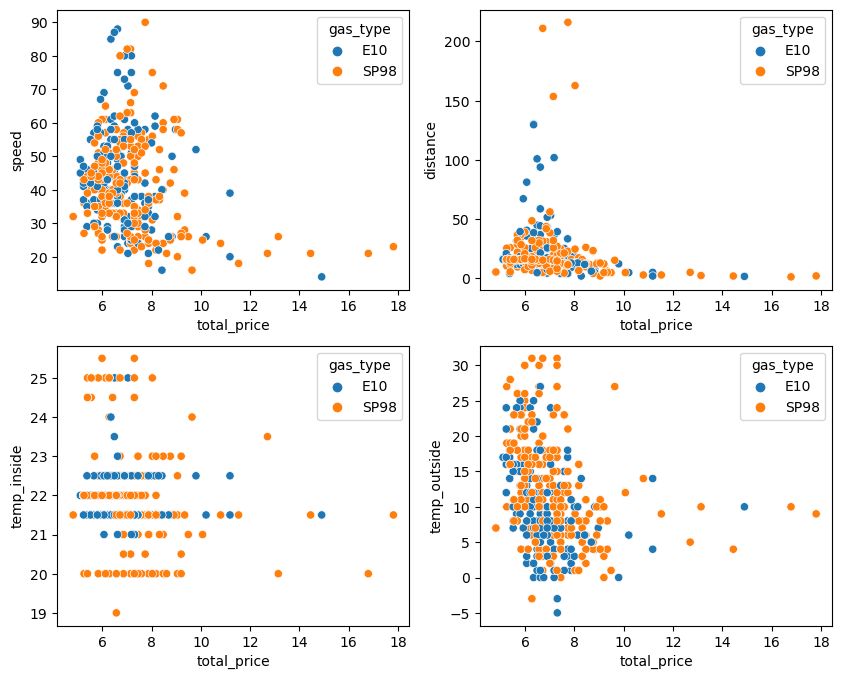

In [231]:
fig,ax = plt.subplots(2,2, figsize=(10,8))

sns.scatterplot(x='total_price', y='speed', hue='gas_type', data=data, ax=ax[0,0])
sns.scatterplot(x='total_price', y='distance', hue='gas_type', data=data, ax=ax[0,1])
sns.scatterplot(x='total_price', y='temp_inside', hue='gas_type', data=data, ax=ax[1,0])
sns.scatterplot(x='total_price', y='temp_outside', hue='gas_type', data=data, ax=ax[1,1])

plt.show()

Is possible to see that prices go higher with smaller speeds, and distance. 

### 3. Predictions

3.1. Modeling

In [232]:
# will predict the consume based on the other variables

In [236]:
X = data.drop(columns=['consume','total_price','unitary_price','gas_type'])
y = data['consume']

In [237]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

X_train.columns = X.columns
X_test.columns = X.columns

In [238]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression().fit(X_train, y_train)

y_pred_train = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)
y_true_train = y_train
y_true_test = y_test

In [245]:
y_true_test

279    4.5
101    5.8
116    5.1
162    5.1
321    4.2
      ... 
206    9.0
188    4.4
168    4.6
11     4.6
230    6.2
Name: consume, Length: 76, dtype: float64